## Two-mode squeezing with stability inset

In [1]:
from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

def stab_squeez(x,theta,dela,loss,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nui,nuf,N,fig,switch):
	### PARAMETERS ####
	#Most of the parameters are given without the constant pi or 2pi.
	kapa = kapa*2.*pi       #\kappa_a (overall coupling for mode a)
	kapb = kapb*2.*pi       #\kappa_b (overall coupling for mode b)
	theta = theta*pi        #\theta (coherent pump phase)
	thetapa = thetapa*pi    #\theta^\prime_a (local oscillator phase for mode a)
	thetapb = thetapb*pi    #\theta^\prime_b (local oscillator phase for mode b)
	phia = phia*pi          #\phi_a (overall phase shift for mode a)
	phib = phib*pi          #\phi_b (overall phase shift for mode b)
	N = N*1000 +1           #resolution of frequencies

	#Parameters calculated from the input parameters
	eps   = x*kapa*exp(1j*theta)                #\epsilon (the coherent pump amplitude)
	Del   = kapa*dela                           #\Delta (detuning of modes a, same as for b but in the opposite direction)
	ta    = kta/kapa                           #\tau_a (time delay in mode a)
	tb    = ktb/kapb                           #\tau_b (time delay in mode b)
	kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
	kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
	kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
	kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    
	#Frequency range initialization (nui:min, nuf:max, N:number of points)
	nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
	def Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb,thetapb,nu):
		ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
		kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)

		### EXPRESSIONS ###
		Ema = np.exp(1j*(-nu*ta+phia))
		Emb = np.exp(1j*(-nu*tb+phib))
		Epa = np.exp(1j*(nu*ta+phia))
		Epb = np.exp(1j*(nu*tb+phib))
		dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
		dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
		dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
		dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
		Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
		Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

		alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
		alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
		beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
		beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
		alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
		alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
		beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
		beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

		Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
		Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
		Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
		Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
		Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
		Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
		Nba = abs(eps)/2.*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
		np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
		Nab = abs(eps)/2.*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
		np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))

		### CORRELATIONS ###
		ncorr = abs(eps)*(1/np.abs(Lab)**2*(np.real(Mba)+Nba))#+1/np.abs(Lba)**2*(np.real(Mab)+Nab))   #(normalized)
		Sout  = 10*np.log10(1+ncorr)
		return Sout
        
	Sout_fb  = Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb,thetapb,nu)    
	Sout_th  = 10*np.log10(1+4*eps*kap1a/((eps-kapa)**2+nu**2))    
	Sout_th1 = 10*np.log10(1+4*eps*kapa/((eps-kapa)**2+nu**2))    
    
	## STABILITY ##    
	ka    = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
	kb    = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    
	## Functions ##
	def Ra(lambr,lambi):
		return lambr+1j*lambi*2*pi+kapa+ka*cos(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
	def Ia(lambr,lambi):
		return Del+ka*sin(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
	def Rb(lambr,lambi):
		return lambr+1j*lambi*2*pi+kapb+kb*cos(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
	def Ib(lambr,lambi):
		return Del-kb*sin(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
    
	## Equations ##
	def eq1(lambr, lambi):
		return (Ra(lambr,lambi)+1j*Ia(lambr,lambi))*(Rb(lambr,lambi)+1j*Ib(lambr,lambi)) - eps**2
	def equation1(l):
		equations = [np.real(eq1(l[0],l[1]))]
		equations.append(np.imag(eq1(l[0],l[1])))
		return equations
	def eq2(lambr, lambi):
		return (Ra(lambr,lambi)-1j*Ia(lambr,lambi))*(Rb(lambr,lambi)-1j*Ib(lambr,lambi)) - eps**2
	def equation2(l):
		equations = [np.real(eq2(l[0],l[1]))]
		equations.append(np.imag(eq2(l[0],l[1])))
		return equations
	
	## Grid ##
	lr = np.linspace(-20,20,200)
	li = np.linspace(-30,30,200)
	lr,li = np.meshgrid(lr,li)

	## Solving the stability equations ##
	lamb1 = np.zeros(2)
	lamb2 = np.zeros(2)
	lamb1 = fsolve(equation1,[10,5])
	lamb2 = fsolve(equation2,[10,5])
	lambr = np.array([lamb1[0],lamb1[0],lamb2[0],lamb2[0]])
	lambi = np.array([lamb1[1],-lamb1[1],lamb2[1],-lamb2[1]])    
    
	## Figures ##
    
	### Linestyles ###
	colors={'brown':(200/255.,154/255.,125/255.),\
			'green':(0,151/255.,78/255.),\
			'blue':(0,120/255.,180/255.),\
			'yellow':(1., 215/255., 0),\
			'black':(0.,0.,0.)}
	collab = ['brown','green','blue','yellow','black']
	linewidth = [2,2,3,3,4]
	linestyle = ['solid','dashed','dashdot','dotted','solid']

	### Squeezing spectrum ###
	fsfont = {'fontname':'FreeSerif'}
	axsq = fig.add_axes([.15,.15,.8,.8]) # main axes
	axsq.hold(True)
	axsq.set_xlabel('$\\nu/(2\pi)$ (MHz)',fontsize = 30,**fsfont)
	axsq.set_ylabel('$S_{out,\\theta^\\prime} (\\nu)$ (dB)',fontsize = 30,**fsfont)
	axsq.set_ylim(-60,20)
	axsq.xaxis.set_label_coords(0.5, -0.08)
	axsq.yaxis.set_label_coords(-0.08,0.5)
	plt.xticks(fontsize = 21,**fsfont)
	plt.yticks(fontsize = 21,**fsfont)
	axsq.plot(nu/2/pi,np.real(Sout_fb),color = colors["brown"],linewidth = 3,linestyle="solid")
	axsq.grid(True)
	axsq.hold(True)
	if switch==True:
		Sout_fbL = Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La+loss,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb+loss,thetapb,nu)    
		axsq.plot(nu/2/pi,np.real(Sout_fbL),color = colors["green"],linewidth = 4,linestyle="dashdot")
	else:
		Sout_fbN = Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La+loss,thetapa,kapb,kap1b,kap2b,ktb,phib,100,thetapb,nu)    
		axsq.plot(nu/2/pi,np.real(Sout_fbN),color = colors["green"],linewidth = 4,linestyle="dashdot")
	axsq.plot(nu/2/pi,np.real(Sout_th),color = colors["yellow"],linewidth = 6,linestyle="dotted")
	axsq.plot(nu/2/pi,np.real(Sout_th1),color = colors["blue"],linewidth = 3,linestyle="dashed")
	#for i in range(4):
	#    axsq.plot(nu,Squeez[:,i],color = colors[collab[i]],linewidth = linewidth[i],linestyle=linestyle[i])
	#    axsq.grid(True)

	### Stability inset ###
	axst=fig.add_axes([0.21,0.23,0.2,0.35])
	axst.hold(True)
	axst.contour(lr,li,np.real(eq2(lr,li)),[0],colors='b')
	axst.contour(lr,li,np.real(eq1(lr,li)),[0],colors='b')
	axst.contour(lr,li,np.imag(eq1(lr,li)),[0],colors='g')
	axst.contour(lr,li,np.imag(eq2(lr,li)),[0],colors='g')
	axst.contour(lr,li,lr,[0],colors='grey',linestyles='dashed')
	axst.plot(lambr,lambi,'o',color = 'r')
	axst.grid(True)
	plt.xticks(fontsize = 14,**fsfont,rotation=60)
	plt.yticks(fontsize = 14,**fsfont,rotation=0)
	axst.set_xlabel('$\lambda_r (MHz)$',fontsize = 16,**fsfont)
	axst.set_ylabel('$\lambda_i (MHz)$',fontsize = 16,**fsfont)
	axst.xaxis.set_label_coords(0.5, -0.12)
	axst.yaxis.set_label_coords(-0.14,0.5)
	axst.set_xlim(-20,20)
	
#stab_squeez(x,theta,dela,loss,kapa,ra,kta,phia,La,thetapa,kapb,rb,ktb,phib,Lb,thetapb,nui,nuf,N,fig,switch):
##switch is True if some loss is necessary besides the lossless calculation,
##and False if one of the loops (b) is switched off

fig = plt.figure(figsize=(9,6))
stab_squeez(0.75,1,0.0,5,10,0.5,1.8833,0.0,0.,0,10,0.5,1.8833,0,0.0,0.,-40,40,50,fig,True)
fig2 = plt.figure(figsize=(9,6))
stab_squeez(0.6875,1,0.,10,10,0.5,2.,0.,0.,0,10,0.5,2.,0.,0.0,0,-40,40,50,fig2,True)
fig3 = plt.figure(figsize=(9,6))
stab_squeez(0.5,1,0.,10,10,0.5,4.2,0.,0.,0,10,0.5,2,0.,0.0,0,-40,40,50,fig3,True)
plt.show()

RuntimeError: Invalid DISPLAY variable

(-0.273134580567+3.24192066532e-17j)


/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:77: RuntimeWarning: invalid value encountered in log10
/home/nnem614/Documents/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:78: RuntimeWarning: invalid value encountered in log10


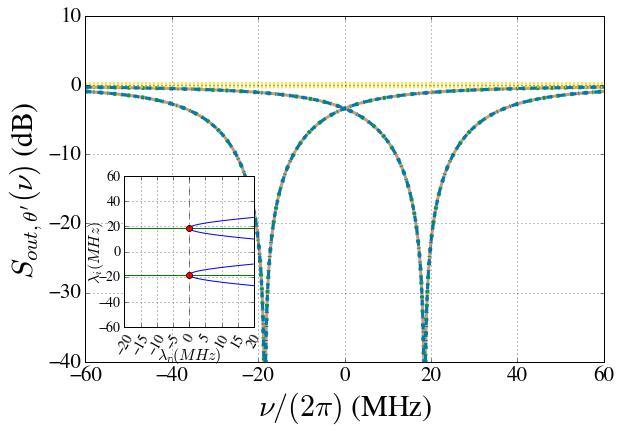

In [26]:
%matplotlib inline

from pylab import *
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display

def stab_squeez_slider(x,theta,dela,loss,kapa,ra,kta,phia,kapb,rb,ktb,phib,nui,nuf,N):
	### PARAMETERS ####
	La=0
	Lb=0    
	thetapa=0
	thetapb=0
	#Most of the parameters are given without the constant pi or 2pi.
	kapa = kapa*2.*pi       #\kappa_a (overall coupling for mode a)
	kapb = kapb*2.*pi       #\kappa_b (overall coupling for mode b)
	theta = theta*pi        #\theta (coherent pump phase)
	thetapa = thetapa*pi    #\theta^\prime_a (local oscillator phase for mode a)
	thetapb = thetapb*pi    #\theta^\prime_b (local oscillator phase for mode b)
	phia = phia*pi          #\phi_a (overall phase shift for mode a)
	phib = phib*pi          #\phi_b (overall phase shift for mode b)
	N = N*1000 +1           #resolution of frequencies

	#Parameters calculated from the input parameters
	eps   = x*kapa*exp(1j*theta)                #\epsilon (the coherent pump amplitude)
	Del   = kapa*dela                           #\Delta (detuning of modes a, same as for b but in the opposite direction)
	ta    = kta/kapa                           #\tau_a (time delay in mode a)
	tb    = ktb/kapb                           #\tau_b (time delay in mode b)
	kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
	kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
	kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
	kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)
    
	#Frequency range initialization (nui:min, nuf:max, N:number of points)
	nu = linspace(nui*2.*pi,nuf*2.*pi,N)
    
	def Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb,thetapb,nu):
		ka = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
		kb = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)

		### EXPRESSIONS ###
		Ema = np.exp(1j*(-nu*ta+phia))
		Emb = np.exp(1j*(-nu*tb+phib))
		Epa = np.exp(1j*(nu*ta+phia))
		Epb = np.exp(1j*(nu*tb+phib))
		dma = kapa-1j*(nu-Del) + ka*Epa         #d_{-,a}(\nu)
		dmb = kapb-1j*(nu+Del) + kb*Epb         #d_{-,b}(\nu)
		dpa = kapa-1j*(nu+Del) + ka*conj(Ema)   #d_{+,a}(\nu)
		dpb = kapb-1j*(nu-Del) + kb*conj(Emb)   #d_{+,b}(\nu)
		Lab = abs(eps)**2 - dpa*dmb          #\Lambda_{ab}(\nu)
		Lba = abs(eps)**2 - dpb*dma          #\Lambda_{ba}(\nu)

		alpha1p = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Epa   #\alpha_1(\nu)
		alpha2p = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Epa   #\alpha_2(\nu)
		beta1p  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Epb   #\beta_1(\nu)
		beta2p  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Epb   #\beta_2(\nu)
		alpha1m = sqrt(2*kap1a)+sqrt(2*kap2a*(1-La/100.))*Ema   #\alpha_1(-\nu)
		alpha2m = sqrt(2*kap2a)+sqrt(2*kap1a*(1-La/100.))*Ema   #\alpha_2(-\nu)
		beta1m  = sqrt(2*kap1b)+sqrt(2*kap2b*(1-Lb/100.))*Emb   #\beta_1(-\nu)
		beta2m  = sqrt(2*kap2b)+sqrt(2*kap1b*(1-Lb/100.))*Emb   #\beta_2(-\nu)

		Da  = sqrt(1-La/100.)*Lba*Epa+dpb*alpha1p*alpha2p
		Db  = sqrt(1-Lb/100.)*Lab*Epb+dpa*beta1p*beta2p
		Ea  = sqrt(La/100.)*(sqrt(2*kap2a)*dpb*alpha2p+Lba)
		Eb  = sqrt(Lb/100.)*(sqrt(2*kap2b)*dpa*beta2p+Lab)
		Mba = exp(1j*(theta-(thetapa+thetapb)/2))*alpha2m*(Db*np.conj(beta1p)+sqrt(2*Lb/100.*kap2b)*Eb)
		Mab = exp(1j*(theta-(thetapa+thetapb)/2))*beta2m*(Da*np.conj(alpha1p)+sqrt(2*La/100.*kap2a)*Ea)
		Nba = abs(eps)*(np.abs(alpha2m)**2*(np.abs(beta1p)**2+2*Lb/100.*kap2b)+\
		np.abs(beta2p)**2*(np.abs(alpha1m)**2+2*La/100.*kap2a))
		Nab = abs(eps)*(np.abs(beta2m)**2*(np.abs(alpha1p)**2+2*La/100.*kap2a)+\
		np.abs(alpha2p)**2*(np.abs(beta1m)**2+2*Lb/100.*kap2b))

		### CORRELATIONS ###
		ncorrm = abs(eps)*(1/np.abs(Lab)**2*(2*np.real(Mba)+Nba))  #(normalized)
		ncorrp = abs(eps)*(1/np.abs(Lba)**2*(2*np.real(Mab)+Nab))   #(normalized)
		Soutm  = 10*np.log10(1.+ncorrm)
		Soutp  = 10*np.log10(1.+ncorrp)
		return Soutm,Soutp
        
	Soutm_fb,Soutp_fb  = Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb,thetapb,nu)    
	Soutp_th  = 10*np.log10(1+4*eps*kap1a/((eps-kapa)**2+(nu-Del)**2))    
	Soutm_th  = 10*np.log10(1.+4*eps*kap1a/((eps-kapa)**2+(nu+Del)**2))
	Soutp_th1 = 10*np.log10(1+4*eps*kapa/((eps-kapa)**2+(nu-Del)**2))
	Soutm_th1 = 10*np.log10(1+4*eps*kapa/((eps-kapa)**2+(nu+Del)**2))    
	print(Soutp_th1[0])
    
	## STABILITY ##    
	ka    = 2*sqrt(ra*(1-ra)*(1-La/100.))*kapa    #k_a (feedback strength in mode a)
	kb    = 2*sqrt(rb*(1-rb)*(1-Lb/100.))*kapb    #k_b (feedback strength in mode b)
    
	## Functions ##
	def Ra(lambr,lambi):
		return lambr+1j*lambi*2*pi+kapa+ka*cos(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
	def Ia(lambr,lambi):
		return Del+ka*sin(phia)*exp(-(1j*2*np.pi*lambi+lambr)*ta)
	def Rb(lambr,lambi):
		return lambr+1j*lambi*2*pi+kapb+kb*cos(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
	def Ib(lambr,lambi):
		return Del-kb*sin(phib)*exp(-(1j*2*np.pi*lambi+lambr)*tb)
    
	## Equations ##
	def eq1(lambr, lambi):
		return (Ra(lambr,lambi)+1j*Ia(lambr,lambi))*(Rb(lambr,lambi)+1j*Ib(lambr,lambi)) - eps**2
	def equation1(l):
		equations = [np.real(eq1(l[0],l[1]))]
		equations.append(np.imag(eq1(l[0],l[1])))
		return equations
	def eq2(lambr, lambi):
		return (Ra(lambr,lambi)-1j*Ia(lambr,lambi))*(Rb(lambr,lambi)-1j*Ib(lambr,lambi)) - eps**2
	def equation2(l):
		equations = [np.real(eq2(l[0],l[1]))]
		equations.append(np.imag(eq2(l[0],l[1])))
		return equations
	
	## Grid ##
	lr = np.linspace(-20,20,200)
	li = np.linspace(-60,60,300)
	lr,li = np.meshgrid(lr,li)

	## Solving the stability equations ##
	lamb1 = np.zeros(2)
	lamb2 = np.zeros(2)
	lamb1 = fsolve(equation1,[10,5])
	lamb2 = fsolve(equation2,[10,5])
	lambr = np.array([lamb1[0],lamb1[0],lamb2[0],lamb2[0]])
	lambi = np.array([lamb1[1],-lamb1[1],lamb2[1],-lamb2[1]])    
    
	## Figures ##
    
	### Linestyles ###
	colors={'brown':(200/255.,154/255.,125/255.),\
			'green':(0,151/255.,78/255.),\
			'blue':(0,120/255.,180/255.),\
			'yellow':(1., 215/255., 0),\
			'black':(0.,0.,0.)}
	collab = ['brown','green','blue','yellow','black']
	linewidth = [2,2,3,3,4]
	linestyle = ['solid','dashed','dashdot','dotted','solid']

	### Squeezing spectrum ###
	fsfont = {'fontname':'FreeSerif'}
	fig=plt.figure(figsize=(9,6))
	axsq = fig.add_axes([.15,.15,.8,.8]) # main axes
	axsq.hold(True)
	axsq.set_xlabel('$\\nu/(2\pi)$ (MHz)',fontsize = 30,**fsfont)
	axsq.set_ylabel('$S_{out,\\theta^\\prime} (\\nu)$ (dB)',fontsize = 30,**fsfont)
	axsq.set_ylim(-40,10)
	axsq.xaxis.set_label_coords(0.5, -0.08)
	axsq.yaxis.set_label_coords(-0.08,0.5)
	plt.xticks(fontsize = 21,**fsfont)
	plt.yticks(fontsize = 21,**fsfont)
	axsq.plot(nu/2/pi,np.real(Soutm_fb),color = colors["brown"],linewidth = 3,linestyle="solid")
	axsq.grid(True)
	axsq.hold(True)
	axsq.plot(nu/2/pi,np.real(Soutp_fb),color = colors["brown"],linewidth = 3,linestyle="solid")
	Soutm_fbL,Soutp_fbL = Squeez(eps,theta,Del,kapa,kap1a,kap2a,kta,phia,La+loss,thetapa,kapb,kap1b,kap2b,ktb,phib,Lb+loss,thetapb,nu)    
	axsq.plot(nu/2/pi,np.real(Soutm_fbL),color = colors["green"],linewidth = 4,linestyle="dashdot")
	axsq.plot(nu/2/pi,np.real(Soutp_fbL),color = colors["green"],linewidth = 4,linestyle="dashdot")
	axsq.plot(nu/2/pi,np.real(Soutm_th),color = colors["yellow"],linewidth = 6,linestyle="dotted")
	axsq.plot(nu/2/pi,np.real(Soutp_th),color = colors["yellow"],linewidth = 6,linestyle="dotted")
	axsq.plot(nu/2/pi,np.real(Soutm_th1),color = colors["blue"],linewidth = 3,linestyle="dashed")
	axsq.plot(nu/2/pi,np.real(Soutp_th1),color = colors["blue"],linewidth = 3,linestyle="dashed")
	#for i in range(4):
	#    axsq.plot(nu,Squeez[:,i],color = colors[collab[i]],linewidth = linewidth[i],linestyle=linestyle[i])
	#    axsq.grid(True)

	### Stability inset ###
	axst=fig.add_axes([0.21,0.23,0.2,0.35])
	axst.hold(True)
	axst.contour(lr,li,np.real(eq2(lr,li)),[0],colors='b')
	axst.contour(lr,li,np.real(eq1(lr,li)),[0],colors='b')
	axst.contour(lr,li,np.imag(eq1(lr,li)),[0],colors='g')
	axst.contour(lr,li,np.imag(eq2(lr,li)),[0],colors='g')
	axst.contour(lr,li,lr,[0],colors='grey',linestyles='dashed')
	axst.plot(lambr,lambi,'o',color = 'r')
	axst.grid(True)
	plt.xticks(fontsize = 14,**fsfont,rotation=60)
	plt.yticks(fontsize = 14,**fsfont,rotation=0)
	axst.set_xlabel('$\lambda_r (MHz)$',fontsize = 16,**fsfont)
	axst.set_ylabel('$\lambda_i (MHz)$',fontsize = 16,**fsfont)
	axst.xaxis.set_label_coords(0.5, -0.12)
	axst.yaxis.set_label_coords(-0.14,0.5)
	axst.set_xlim(-20,20)
	plt.show()
#stab_squeez(x,theta,dela,loss,kapa,ra,kta,phia,kapb,rb,ktb,phib,nui,nuf,N):
##switch is True if some loss is necessary besides the lossless calculation,
##and False if one of the loops (b) is switched off

x_slider       = widgets.FloatSlider(value = 1, min=0., max=2., step=0.01, description='$|\epsilon| (\kappa)$')
loss_slider    = widgets.FloatSlider(value = 0, min=0., max=100., step=1, description='loss (%)')
dela_slider    = widgets.FloatSlider(value = 0.0, min=0., max=10., step=0.01, description='$\Delta (\kappa_a)$')
ra_slider      = widgets.FloatSlider(value = 0.0, min=0., max=1., step=0.001, description='$\kappa_{1,a} (\kappa_a)$')
rb_slider      = widgets.FloatSlider(value = 0.0, min=0., max=1., step=0.001, description='$\kappa_{1,b} (\kappa_b)$')
kta_slider     = widgets.FloatSlider(value = 0, min=0., max=10., step=0.0001, description='$\kappa_{a}\\tau_a$')
ktb_slider     = widgets.FloatSlider(value = 0, min=0., max=10., step=0.0001, description='$\kappa_{b}\\tau_b$')
phia_slider    = widgets.FloatSlider(value = 0.0, min=0., max=2., step=0.001, description='$\phi_a (\pi)$')
phib_slider    = widgets.FloatSlider(value = 0., min=0., max=2., step=0.001, description='$\phi_b (\pi)$')
theta_slider   = widgets.FloatSlider(value = 1., min=-1., max=1., step=0.01, description='$\\theta (\pi)$')
nui_fill       = widgets.FloatText(value=-60., description='Frequency min $(2\pi)$')
nuf_fill       = widgets.FloatText(value=60., description='Frequency max $(2\pi)$')
N_fill         = widgets.IntText(value=100., description='Resolution $\left(10^3 \\right)$')
kapa_fill    = widgets.FloatText(value = 10., description='$\kappa_a (2\pi)$')
kapb_fill    = widgets.FloatText(value = 10., description='$\kappa_b (2\pi)$')

#interactive setup
w = interactive(stab_squeez_slider,x=x_slider,theta=theta_slider,dela=dela_slider,loss=loss_slider,kapa=kapa_fill,\
                ra=ra_slider,kta=kta_slider,phia=phia_slider,kapb=kapb_fill,rb=rb_slider,ktb=ktb_slider,\
                phib=phib_slider,nui=nui_fill,nuf=nuf_fill,N=N_fill)
#show sliders
display(w)